In [145]:
res.aicc

-312.211837253936

In [143]:
import warnings
warnings.filterwarnings("ignore")

In [147]:
for p in [1,2,3,4,5]:
    for q in [0, 1, 2]:
        for d in [0, 1, 2]:
            mod = ARIMA(x, order=(p,d,q))
            res = mod.fit()
            print("p={}, d={}, q={} --> AICc = {}".format(p,d,q, res.aicc))

p=1, d=0, q=0 --> AICc = -291.3879197932881
p=1, d=1, q=0 --> AICc = -298.9949984610441
p=1, d=2, q=0 --> AICc = -187.20998005607777
p=1, d=0, q=1 --> AICc = -295.75739580764116
p=1, d=1, q=1 --> AICc = -313.25261500014005
p=1, d=2, q=1 --> AICc = -289.8561590385589
p=1, d=0, q=2 --> AICc = -310.72107601169165
p=1, d=1, q=2 --> AICc = -314.2070203446008
p=1, d=2, q=2 --> AICc = -286.90267638249236
p=2, d=0, q=0 --> AICc = -294.47815923641673
p=2, d=1, q=0 --> AICc = -312.211837253936
p=2, d=2, q=0 --> AICc = -217.191751579354
p=2, d=0, q=1 --> AICc = -292.0309870270822
p=2, d=1, q=1 --> AICc = -316.05584764845736
p=2, d=2, q=1 --> AICc = -303.5359955590865
p=2, d=0, q=2 --> AICc = -298.88375958833296
p=2, d=1, q=2 --> AICc = -314.0057202551448
p=2, d=2, q=2 --> AICc = -311.9230522067034
p=3, d=0, q=0 --> AICc = -307.0100426940908
p=3, d=1, q=0 --> AICc = -317.57553783575423
p=3, d=2, q=0 --> AICc = -259.0970807227858
p=3, d=0, q=1 --> AICc = -310.4531038108114
p=3, d=1, q=1 --> AICc = 

In [149]:
best_aicc = float('inf')
best_p, best_d, best_q = None, None, None

for p in [1, 2, 3, 4, 5]:
    for q in [0, 1, 2]:
        for d in [0, 1, 2]:
            try:
                mod = ARIMA(x, order=(p, d, q))
                res = mod.fit()
                aicc = res.aicc
                print("p={}, d={}, q={} --> AICc = {}".format(p, d, q, aicc))
                
                if aicc < best_aicc:
                    best_aicc = aicc
                    best_p, best_d, best_q = p, d, q
            except:
                continue

print("Meilleure combinaison : p={}, d={}, q={} avec AICc = {}".format(best_p, best_d, best_q, best_aicc))


p=1, d=0, q=0 --> AICc = -291.3879197932881
p=1, d=1, q=0 --> AICc = -298.9949984610441
p=1, d=2, q=0 --> AICc = -187.20998005607777
p=1, d=0, q=1 --> AICc = -295.75739580764116
p=1, d=1, q=1 --> AICc = -313.25261500014005
p=1, d=2, q=1 --> AICc = -289.8561590385589
p=1, d=0, q=2 --> AICc = -310.72107601169165
p=1, d=1, q=2 --> AICc = -314.2070203446008
p=1, d=2, q=2 --> AICc = -286.90267638249236
p=2, d=0, q=0 --> AICc = -294.47815923641673
p=2, d=1, q=0 --> AICc = -312.211837253936
p=2, d=2, q=0 --> AICc = -217.191751579354
p=2, d=0, q=1 --> AICc = -292.0309870270822
p=2, d=1, q=1 --> AICc = -316.05584764845736
p=2, d=2, q=1 --> AICc = -303.5359955590865
p=2, d=0, q=2 --> AICc = -298.88375958833296
p=2, d=1, q=2 --> AICc = -314.0057202551448
p=2, d=2, q=2 --> AICc = -311.9230522067034
p=3, d=0, q=0 --> AICc = -307.0100426940908
p=3, d=1, q=0 --> AICc = -317.57553783575423
p=3, d=2, q=0 --> AICc = -259.0970807227858
p=3, d=0, q=1 --> AICc = -310.4531038108114
p=3, d=1, q=1 --> AICc = 

In [150]:
mod = ARIMA(x, order=(3,1,1))
res = mod.fit()

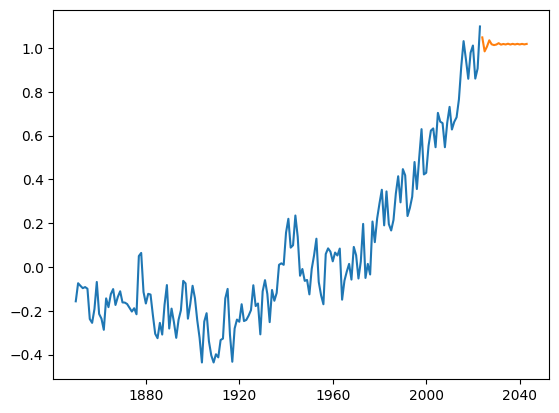

In [151]:
plt.plot(x)
plt.plot(res.forecast(20))

,Year,averageAnomaly-global
0,1850,-0.156667
1,1851,-0.074167
2,1852,-0.085833
3,1853,-0.096667
4,1854,-0.091667
...,...,...
169,2019,0.978333
170,2020,1.010833
171,2021,0.860000
172,2022,0.905833
